In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost
import scikitplot as skplt
import sklearn

from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.cross_validation import StratifiedKFold

seed = 117
np.random.seed(seed)

In [6]:
%cd Data

/home/jovyan/PrIMP/Data


In [8]:
datafile = open('cholera.combined.txt', 'r')
data = pd.read_csv(datafile, sep = "\t")

In [12]:
data.shape

(76, 7444)

In [39]:
X=data.iloc[:,1:7444].values
y=data.iloc[:,-1].values

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [44]:
y_pred=classifier.predict(X_test)

/srv/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [47]:
cm

array([[9, 0],
       [0, 7]])

In [93]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

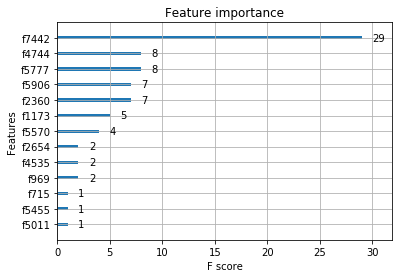

In [94]:
plot_importance(classifier)
pyplot.show()

In [90]:
import matplotlib.pyplot as plt

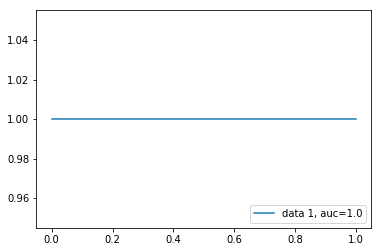

In [91]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [48]:
cv=StratifiedKFold(y, n_folds=10, shuffle=True, random_state=seed)

In [50]:
params_grid = {
    'max_depth':[1, 2, 3],
    'n_estimators':[5, 10, 25, 50],
    'learning_rate': np.linspace(0.00001, 1, 3)
}

In [51]:
params_fixed = {
    'objective':'binary:logistic',
    'silent':1
}

In [52]:
bst_grid = GridSearchCV(
    estimator=XGBClassifier(**params_fixed, seed=seed),
    param_grid=params_grid,
    cv=cv,
    scoring='accuracy'
)

In [53]:
bst_grid.fit(X,y)

/srv/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/srv/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/srv/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/srv/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 0 ... 0 0], n_folds=10, shuffle=True, random_state=117),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=117, silent=1,
       subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3], 'n_estimators': [5, 10, 25, 50], 'learning_rate': array([1.00000e-05, 5.00005e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [54]:
print("Best accuracy obtained: {O}".format(bst_grid.best_score))
print("Parameters:")
for key, value in bst_grid.best_params_.items():
    print("\t{}:{}".format(key,value))

AttributeError: 'GridSearchCV' object has no attribute 'best_score'

In [59]:
from random import randint
from random import uniform

In [61]:
params_dist_grid = {
    'max_depth':[1, 2, 3, 4],
    'gamma':[0, 0.5, 1],
    'n_estimators':randint(1,1001),
    'learning_rate':uniform(0.000001, 1),
    'subsample':uniform(2,8),
    'colsample_bytree':uniform(2,10)
}

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [74]:
rm_grid = RandomizedSearchCV(
    estimator=XGBClassifier(**params_fixed, seed=seed),
    param_distribution=params_dist_grid,
    n_iter=25,
    cv=cv,
    scoring='accuracy'
)

TypeError: __init__() got an unexpected keyword argument 'param_distribution'

In [ ]:
rm_grid.fit(X,y)

In [ ]:
rs_grid.best_estimator_

In [ ]:
rs_grid.best_params_